# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()



True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=2, sort_keys=True))


{
  "data": {
    "1": {
      "circulating_supply": 18852312,
      "id": 1,
      "last_updated": 1635031103,
      "max_supply": 21000000,
      "name": "Bitcoin",
      "quotes": {
        "USD": {
          "market_cap": 1158042516321,
          "percent_change_1h": -0.530871044661653,
          "percent_change_24h": 0.920078848072154,
          "percent_change_7d": -0.627702162316601,
          "percentage_change_1h": -0.530871044661653,
          "percentage_change_24h": 0.920078848072154,
          "percentage_change_7d": -0.627702162316601,
          "price": 61421.0,
          "volume_24h": 28611659336
        }
      },
      "rank": 1,
      "symbol": "BTC",
      "total_supply": 18852312,
      "website_slug": "bitcoin"
    }
  },
  "metadata": {
    "error": null,
    "num_cryptocurrencies": 3105,
    "timestamp": 1635031103
  }
}


In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=2, sort_keys=True))


{
  "data": {
    "1027": {
      "circulating_supply": 118049920,
      "id": 1027,
      "last_updated": 1635031181,
      "max_supply": 0,
      "name": "Ethereum",
      "quotes": {
        "USD": {
          "market_cap": 489958079172,
          "percent_change_1h": -0.226140712137265,
          "percent_change_24h": 3.75269874805319,
          "percent_change_7d": 6.41791440643733,
          "percentage_change_1h": -0.226140712137265,
          "percentage_change_24h": 3.75269874805319,
          "percentage_change_7d": 6.41791440643733,
          "price": 4135.02,
          "volume_24h": 15969389539
        }
      },
      "rank": 2,
      "symbol": "ETH",
      "total_supply": 118049920,
      "website_slug": "ethereum"
    }
  },
  "metadata": {
    "error": null,
    "num_cryptocurrencies": 3105,
    "timestamp": 1635031181
  }
}


#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
print(btc_price)


61421.0


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
print(eth_price)


4135.02


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC
print(btc_value)


73705.2


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH
print(eth_value)

21915.606


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(total_crypto_wallet)


95620.806


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
type(alpaca_secret_key)

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY","AGG"]

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2021-10-19", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-10-19", tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [16]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
portfolio_prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Review the first 5 rows of the Alpaca DataFrame
portfolio_prices_df.head()


AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-10-19 00:00:00-04:00  114.37  114.37  114.16  114.18  3999066  448.92   

                                                            
                            high     low   close    volume  
time                                                        
2021-10-19 00:00:00-04:00  450.7  448.27  450.68  40790864

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(portfolio_prices_df["AGG"]["close"])

# Print the AGG closing price
print(agg_close_price)


114.18


In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(portfolio_prices_df["SPY"]["close"])

# Print the SPY closing price
print(spy_close_price)


450.68


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(agg_value)


22836.0


In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
print(spy_value)


49574.8


In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(total_stocks_bonds)


72410.8


In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current portfolio balance
print(total_portfolio)


168031.606


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
print(savings_data)

[95620.806, 72410.8]


#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(
    columns = ["amount"],
    index = ["crypto", "stock/bond"]
)

savings_df["amount"] = savings_data

# Display the savings_df DataFrame
savings_df


,amount
crypto,95620.806
stock/bond,72410.800


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Savings Composition as of 2021-10-19'}, ylabel='amount'>

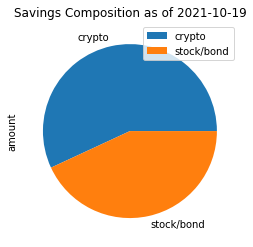

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y="amount", title = "Savings Composition as of 2021-10-19")


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3 * monthly_income


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
portfolio_fund_difference = (total_portfolio - emergency_fund_value)

if total_portfolio > emergency_fund_value:
    print(f"Congratulations! You have saved enough to meet your emergency fund goal, with ${portfolio_fund_difference: .2f} to spare!")
elif total_portfolio == emergency_fund_value:
    print(f"Great job! You have saved enough to meet your emergency fund goal!")
else:
    print(f"Unfortunately, you still need to save ${portfolio_fund_difference*-1: .2f} in order to meet your emergency fund goal.")



Congratulations! You have saved enough to meet your emergency fund goal, with $ 132031.61 to spare!


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date_mc = pd.Timestamp("2019-10-20", tz="America/New_York").isoformat()
end_date_mc = pd.Timestamp("2021-10-20", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [29]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
portfolio_mc_simulation_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date_mc,
    end = end_date_mc,
    limit = limit_rows
).df


# Display both the first and last five rows of the DataFrame
display(portfolio_mc_simulation_df.head())
display(portfolio_mc_simulation_df.tail())


AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2019-10-21 00:00:00-04:00  112.62  112.7100  112.4900  112.51  2431676   
2019-10-22 00:00:00-04:00  112.65  112.7375  112.5100  112.66  1889075   
2019-10-23 00:00:00-04:00  112.82  112.8800  112.7300  112.73  1787456   
2019-10-24 00:00:00-04:00  112.84  112.9459  112.7500  112.77  1589781   
2019-10-25 00:00:00-04:00  112.84  112.8500  112.5229  112.62  2325950   

                              SPY                                       
                             open    high       low    close    volume  
time                                                                    
2019-10-21 00:00:00-04:00  299.42  300.21  298.9350  300.050  29676133  
2019-10-22 00:00:00-04:00  300.58  300.90  298.9100  299.030  42747335  
2019-10-23 00:00:00-04:00  298.73  299.94  298.4950  299.860  27944600  
2019-10-24 00:00:00-04:00  300.91  301.07  299.4601  300.420  29850958  
2019-10-25 00:00:00-04:00  299.74  302.20  299.6806  301.565  36933520

AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2021-10-14 00:00:00-04:00  114.70  114.8496  114.63  114.84  3540673  439.08   
2021-10-15 00:00:00-04:00  114.61  114.6300  114.51  114.56  3829388  444.76   
2021-10-18 00:00:00-04:00  114.33  114.5600  114.25  114.49  5145953  443.97   
2021-10-19 00:00:00-04:00  114.37  114.3700  114.16  114.18  3999066  448.92   
2021-10-20 00:00:00-04:00  114.17  114.2900  114.06  114.07  5881766  451.13   

                                                              
                              high     low   close    volume  
time                                                          
2021-10-14 00:00:00-04:00  442.660  438.58  442.47  59812568  
2021-10-15 00:00:00-04:00  446.260  444.09  445.83  55980388  
2021-10-18 00:00:00-04:00  447.550  443.27  447.22  51994387  
2021-10-19 00:00:00-04:00  450.700  448.27  450.68  40790864  
2021-10-20 00:00:00-04:00  452.732  451.01  452.39  41594298

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_even_weight = MCSimulation(
    portfolio_data = portfolio_mc_simulation_df,
    weights = [.4,.6],
    num_simulation = 500, 
    num_trading_days = 252*30
)

# Review the simulation input data
MC_even_weight.portfolio_data.head()


AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2019-10-21 00:00:00-04:00  112.62  112.7100  112.4900  112.51  2431676   
2019-10-22 00:00:00-04:00  112.65  112.7375  112.5100  112.66  1889075   
2019-10-23 00:00:00-04:00  112.82  112.8800  112.7300  112.73  1787456   
2019-10-24 00:00:00-04:00  112.84  112.9459  112.7500  112.77  1589781   
2019-10-25 00:00:00-04:00  112.84  112.8500  112.5229  112.62  2325950   

                                           SPY                             \
                          daily_return    open    high       low    close   
time                                                                        
2019-10-21 00:00:00-04:00          NaN  299.42  300.21  298.9350  300.050   
2019-10-22 00:00:00-04:00     0.001333  300.58  300.90  298.9100  299.030   
2019-10-23 00:00:00-04:00     0.000621  298.73  299.94  298.4950  299.860   
2019-10-24 00:00:00-04:00     0.000355  300.91  301.07  299.4601  300.420   
2019-10-25 00:00:00-04:00    -0.001330  299.74  302.20  299.6806  301.565   

                                                  
                             volume daily_return  
time                                              
2019-10-21 00:00:00-04:00  29676133          NaN  
2019-10-22 00:00:00-04:00  42747335    -0.003399  
2019-10-23 00:00:00-04:00  27944600     0.002776  
2019-10-24 00:00:00-04:00  29850958     0.001868  
2019-10-25 00:00:00-04:00  36933520     0.003811

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_weight.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.014183,1.003897,1.003060,1.017564,0.987160,1.004576,0.986693,0.995417,0.998968,0.982011,...,1.000685,1.013197,1.008902,1.014144,0.990167,0.992838,0.991802,0.998401,1.001860,0.987996
2,1.024401,1.008584,1.007686,1.023385,0.994330,1.002636,0.987245,0.994506,1.004452,0.987859,...,1.001744,1.011713,1.011820,1.025650,0.992559,0.980802,0.988569,1.014181,0.997840,0.995770
3,1.036175,1.025658,1.016137,1.031753,1.005295,0.995833,0.979754,0.987095,1.002459,0.993537,...,0.993175,0.994941,1.005771,1.024617,0.989986,0.990290,0.975205,1.003996,0.979259,1.002703
4,1.061266,1.010182,1.024965,1.049431,1.004717,0.985153,0.986832,0.988839,1.013793,0.969249,...,1.000951,0.995991,0.989879,1.028147,0.980002,0.994160,0.988507,1.013819,0.971915,0.999993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,57.149086,110.175984,68.032543,57.745386,63.477625,103.334532,22.985627,125.928563,45.719624,54.829227,...,49.444605,95.208127,371.987882,62.865125,26.516527,50.775715,32.595561,58.341167,11.580164,107.214758
7557,56.799660,110.210895,67.855427,57.249919,63.240679,104.887859,23.455147,127.954309,45.775984,55.387497,...,49.328505,92.894582,369.595485,61.275091,26.586714,50.660542,32.099137,57.484895,11.639331,107.396025
7558,56.783802,110.463141,67.530767,56.188341,62.288684,104.407713,23.471915,127.422327,45.866996,55.750738,...,49.235451,93.550048,371.778078,61.218300,27.035297,50.680290,32.304795,57.360724,11.416777,107.226134
7559,57.093943,111.376966,68.319605,56.436103,62.466451,103.786582,23.279385,127.966017,46.085145,56.002158,...,49.561610,92.606591,370.883856,61.378048,27.341815,51.147771,32.070531,57.432303,11.280820,106.111003


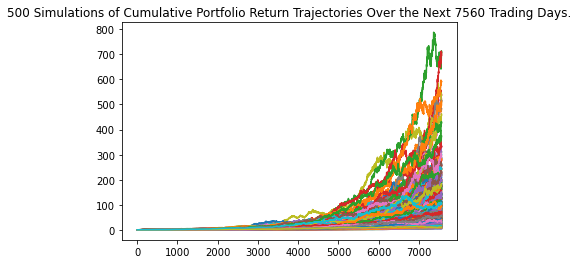

In [32]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
even_weight_line_plot = MC_even_weight.plot_simulation()


#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

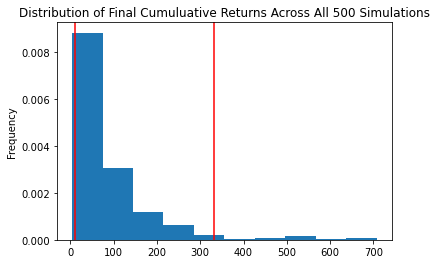

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
even_weight_plot_distribution = MC_even_weight.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
even_weight_table = MC_even_weight.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(even_weight_table)

count           500.000000
mean             89.659084
std              94.922814
min               3.961832
25%              34.371107
50%              58.330814
75%             107.267010
max             707.125707
95% CI Lower     10.753080
95% CI Upper    332.545793
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?
-  The lower and upper bounds for the expected value of the portfolio with a 95% confidence interval are $11.08 and $312.67 respectively.


In [35]:
# Print the current balance of the stock and bond portion of the members portfolio
print(total_stocks_bonds)


72410.8


In [55]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = (even_weight_table[8]*total_stocks_bonds)
ci_upper_thirty_cumulative_return = (even_weight_table[9]*total_stocks_bonds)

# Print the result of your calculations
print(f"There is a 95% chance that starting with the current total of stocks and bongs in the portfolio, ${total_stocks_bonds: .2f},"
      f" and with an even weight portfolio over the next 30 years, the resulting balance will be within in the range of"
      f" ${ci_lower_thirty_cumulative_return: .2f} to ${ci_upper_thirty_cumulative_return: .2f}.")


There is a 95% chance that starting with the current total of stocks and bongs in the portfolio, $ 72410.80, and with an even weight portfolio over the next 30 years, the resulting balance will be within in the range of $ 778639.10 to $ 24079906.93.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [44]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_agg20_spy80 = MCSimulation(
    portfolio_data = portfolio_mc_simulation_df,
    weights = [.2,.8],
    num_simulation = 500,
    num_trading_days= 252*10
)

# Review the simulation input data
MC_agg20_spy80.portfolio_data.head()


AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2019-10-21 00:00:00-04:00  112.62  112.7100  112.4900  112.51  2431676   
2019-10-22 00:00:00-04:00  112.65  112.7375  112.5100  112.66  1889075   
2019-10-23 00:00:00-04:00  112.82  112.8800  112.7300  112.73  1787456   
2019-10-24 00:00:00-04:00  112.84  112.9459  112.7500  112.77  1589781   
2019-10-25 00:00:00-04:00  112.84  112.8500  112.5229  112.62  2325950   

                                           SPY                             \
                          daily_return    open    high       low    close   
time                                                                        
2019-10-21 00:00:00-04:00          NaN  299.42  300.21  298.9350  300.050   
2019-10-22 00:00:00-04:00     0.001333  300.58  300.90  298.9100  299.030   
2019-10-23 00:00:00-04:00     0.000621  298.73  299.94  298.4950  299.860   
2019-10-24 00:00:00-04:00     0.000355  300.91  301.07  299.4601  300.420   
2019-10-25 00:00:00-04:00    -0.001330  299.74  302.20  299.6806  301.565   

                                                  
                             volume daily_return  
time                                              
2019-10-21 00:00:00-04:00  29676133          NaN  
2019-10-22 00:00:00-04:00  42747335    -0.003399  
2019-10-23 00:00:00-04:00  27944600     0.002776  
2019-10-24 00:00:00-04:00  29850958     0.001868  
2019-10-25 00:00:00-04:00  36933520     0.003811

In [45]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_agg20_spy80.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011873,0.998298,1.000116,1.002095,1.005475,1.018506,1.008351,1.008794,1.004016,1.001227,...,0.995550,1.031042,1.010421,0.996262,0.992388,0.977064,0.995656,0.996798,1.007281,1.013687
2,1.003929,0.993972,1.007266,1.002258,1.014253,1.031815,1.018235,0.993860,1.001957,0.985256,...,1.018953,1.015299,1.041087,0.990440,0.984905,0.983996,0.985025,1.002691,1.004501,1.030114
3,1.017323,0.993114,0.997172,1.021836,1.002716,1.017876,1.029329,0.998903,1.024760,1.002472,...,1.012447,1.002836,1.025975,0.996141,0.995006,0.984104,0.960701,1.007950,0.985024,1.039239
4,1.011169,1.007701,1.005828,1.015027,0.995052,1.027632,1.030068,1.005283,1.032688,1.011141,...,1.020218,1.024656,1.019935,0.984233,1.009765,0.993844,0.951915,0.992051,1.020911,1.031106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,6.658554,16.433649,2.323702,4.112996,10.753234,1.237776,3.009029,4.037596,4.188736,3.297087,...,2.848523,3.313019,4.823908,26.200326,5.772110,3.750657,4.219242,7.868813,6.826950,20.721570
2517,6.668610,16.774237,2.333224,4.142358,10.790314,1.234406,2.963695,4.023951,4.278115,3.311024,...,2.796945,3.357982,4.849701,26.065447,5.765981,3.800463,4.224694,7.855744,6.844678,20.563800
2518,6.631062,16.519732,2.337485,4.153983,10.932948,1.252435,2.950706,3.998356,4.237718,3.266441,...,2.716426,3.328676,4.924887,25.870170,5.935682,3.731223,4.276941,7.993639,6.656430,20.820971
2519,6.724270,16.606536,2.350576,4.181588,11.066174,1.257473,2.979917,4.024773,4.200191,3.265097,...,2.703243,3.305862,4.823818,26.283303,5.877081,3.664932,4.284463,7.901395,6.627280,20.900283


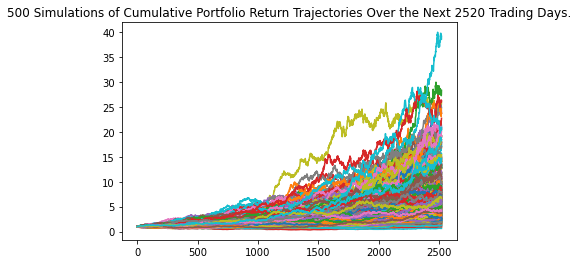

In [47]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
agg20_spy80_overlay = MC_agg20_spy80.plot_simulation()


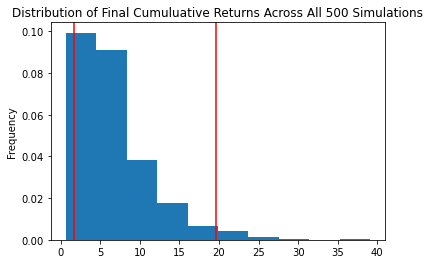

In [48]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram

agg20_spy80_distribution = MC_agg20_spy80.plot_distribution()


In [49]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
agg20_spy80_table = MC_agg20_spy80.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
agg20_spy80_table


count           500.000000
mean              6.855849
std               4.782707
min               0.643549
25%               3.643026
50%               5.389392
75%               8.528062
max              39.098687
95% CI Lower      1.617426
95% CI Upper     19.656057
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [50]:
# Print the current balance of the stock and bond portion of the members portfolio
print(total_stocks_bonds)


72410.8


In [54]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = (agg20_spy80_table[8]*total_stocks_bonds)
ci_upper_ten_cumulative_return = (agg20_spy80_table[9]*total_stocks_bonds)

# Print the result of your calculations
print(f"There is a 95% chance that starting with the current total of stocks and bonds in the portfolio, ${total_stocks_bonds: .2f},"
      f" and with a 20/80 portfolio over the next 10 years, the resulting balance will be within in the range of"
      f" ${ci_lower_ten_cumulative_return: .2f} to ${ci_upper_ten_cumulative_return: .2f}.")


There is a 95% chance that starting with the current total of stocks and bonds in the portfolio, $ 72410.80, and with a 20/80 portfolio over the next 10 years, the resulting balance will be within in the range of $ 117119.08 to $ 1423310.82.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?